In [1]:
import json
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from warnings import filterwarnings
from sklearn.cluster import AgglomerativeClustering

filterwarnings('ignore')
%matplotlib inline

In [2]:
base_path = os.path.dirname(os.path.abspath("_file_"))

json_dir = base_path + "/Solutions"

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        data = json.loads(f.read())
        temp_data = {}
        temp_data['Assignments'] = []
        for course in data['Assignments']:
            if '-' in course['Course']:
                courses_list = course['Course'].split('-')
                for i in range(len(courses_list)):
                    temp_dict = {'Course': courses_list[i], 'Events':[course['Events'][i]]}
                    temp_data['Assignments'].append(temp_dict)
            else:
                temp_data['Assignments'].append(course)
        data = temp_data
        json_data = pd.json_normalize(data=data['Assignments'], record_path='Events', meta=['Course'])
    dfs.append(json_data)
df = pd.concat(dfs, ignore_index = True)
df

,Exam,Part,Period,Room,Course
0,0,Oral,27,438,2414
1,0,Oral,32,303,2416
2,0,Oral,25,307,2417
3,0,Oral,19,437,2418
4,0,Oral,33,304,2419
...,...,...,...,...,...
10829,1,Oral,301,482,3674
10830,0,Written,14,471,3733
10831,0,Oral,15,488,3734
10832,1,Written,284,471,3735


In [3]:
df['Room'] = df['Room'].fillna(df['Room'].mode()[0])

In [4]:
df_converted = df.astype({'Room':'int64', 'Course':'int64'})
df = df_converted

In [5]:
X = df.iloc[:, [2,3,4]]

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)
df_scale = pd.DataFrame(X_scale, columns=X.columns)

In [7]:
df_scale

,Period,Room,Course
0,-0.411163,-1.675656,-1.644642
1,-0.283379,-1.777599,-1.644543
2,-0.462276,-1.774579,-1.644494
3,-0.615616,-1.676411,-1.644445
4,-0.257822,-1.776844,-1.644395
...,...,...,...
10829,6.591379,-1.642430,-1.582497
10830,-0.743400,-1.650736,-1.579587
10831,-0.717843,-1.637899,-1.579537
10832,6.156915,-1.650736,-1.579488


Text(0, 0.5, 'Euclidean distances')

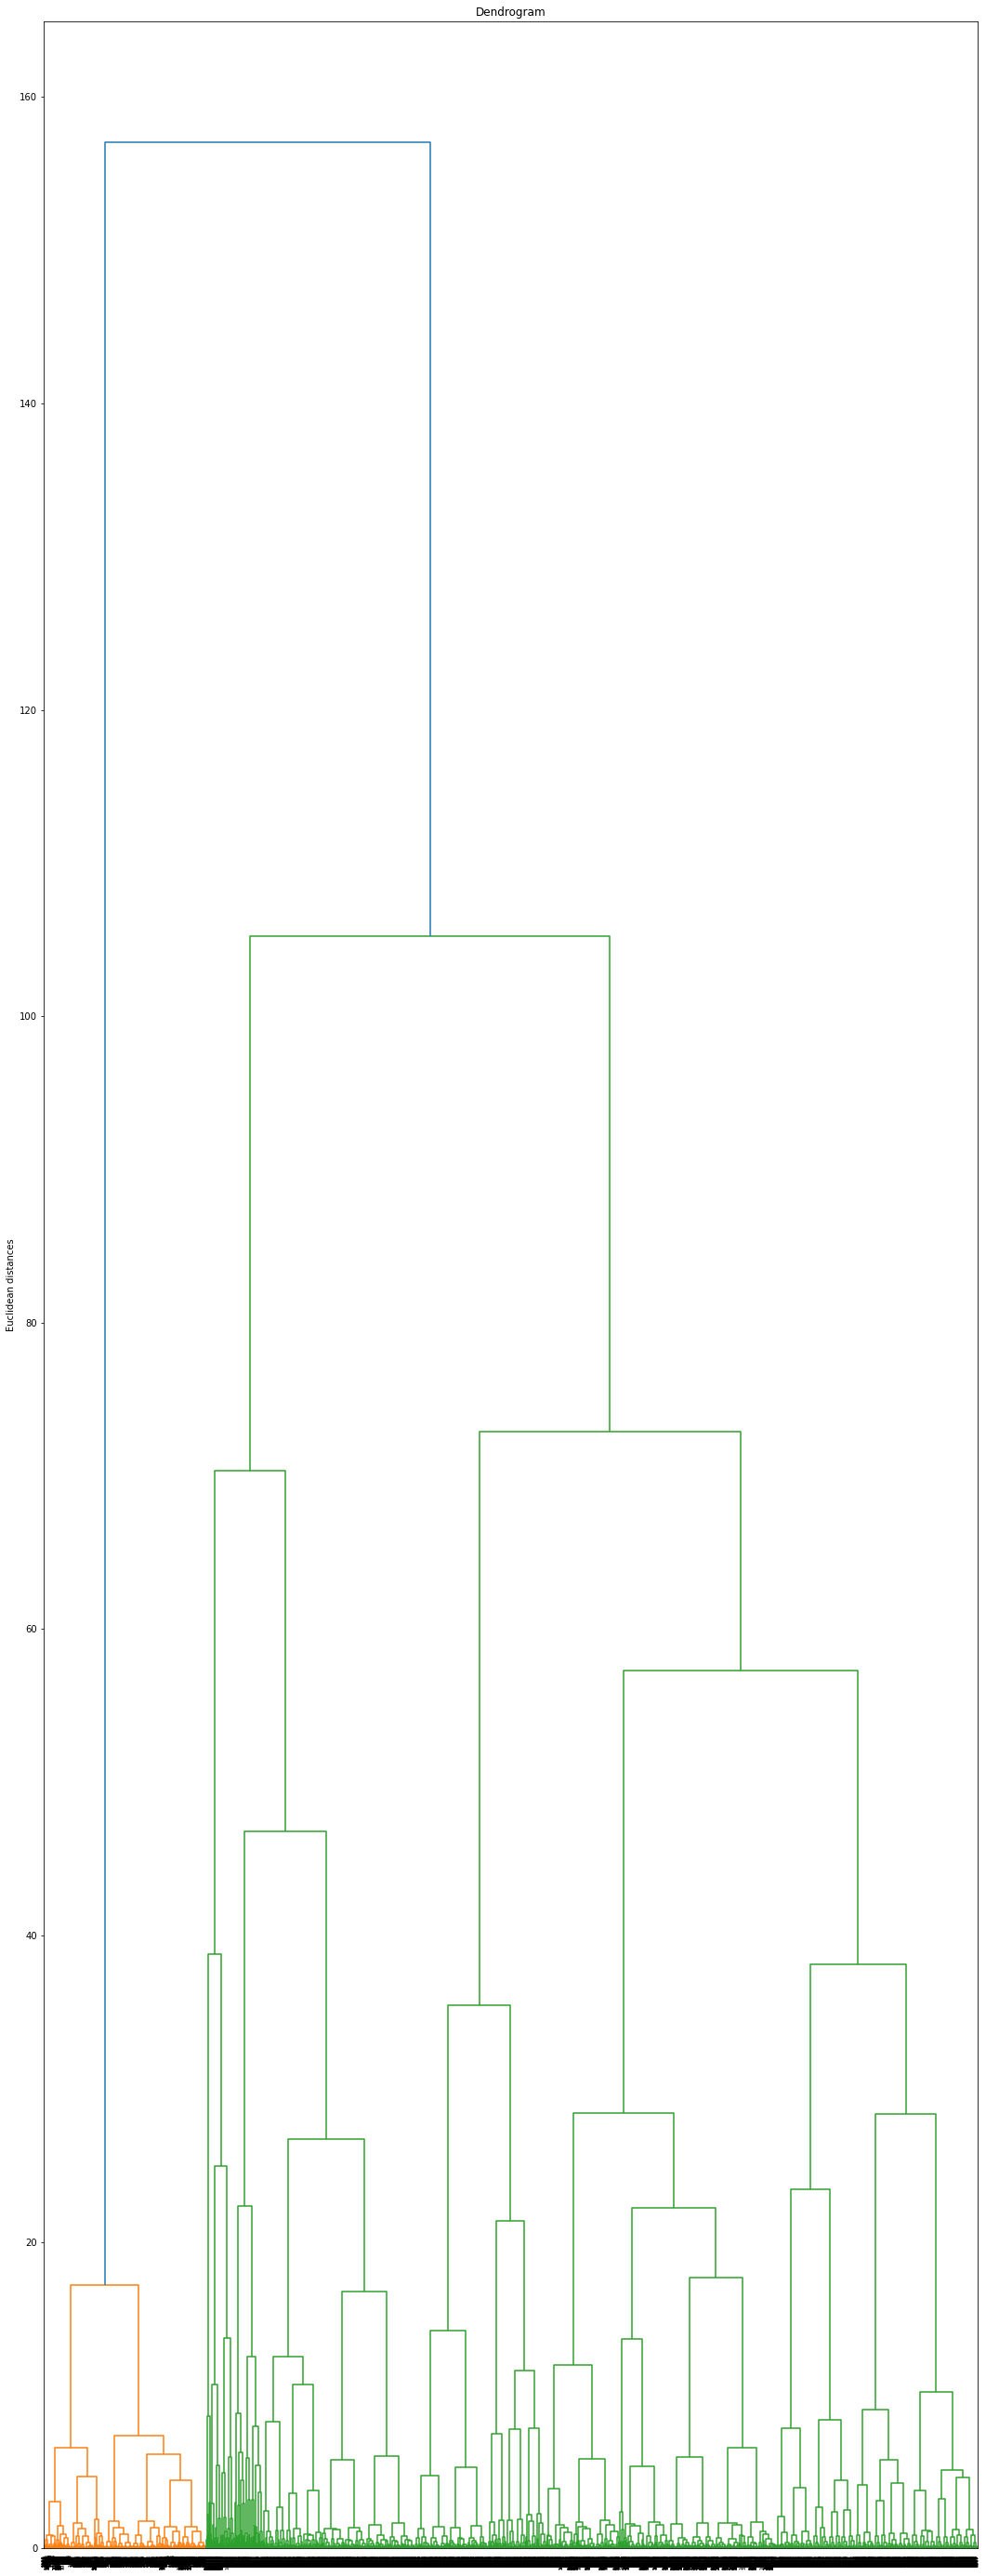

In [8]:
plt.figure(figsize=(18,50))

# Within cluster variance is reduced with ward method
dendrogram=dendrogram(linkage(df_scale,method='ward'), )
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')

In [19]:
hc2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc2_clusters = hc2.fit(df_scale)

In [20]:
hc2_clustered = df_scale.copy()

#append labels to points
hc2_clustered.loc[:,'Cluster'] = hc2_clusters.labels_

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering with 3 Clusters')

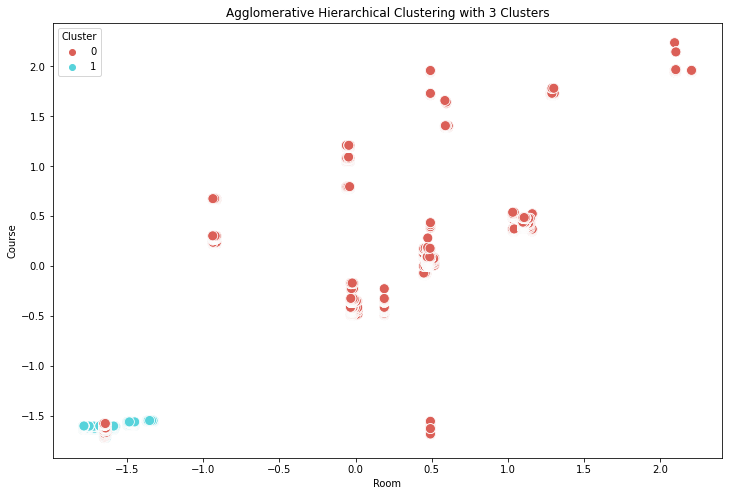

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(hc2_clustered['Room'], hc2_clustered['Course'], s=100, hue=hc2_clustered['Cluster'],
                palette=sns.color_palette('hls', 2))

plt.title('Agglomerative Hierarchical Clustering with 3 Clusters')

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering with 3 Clusters')

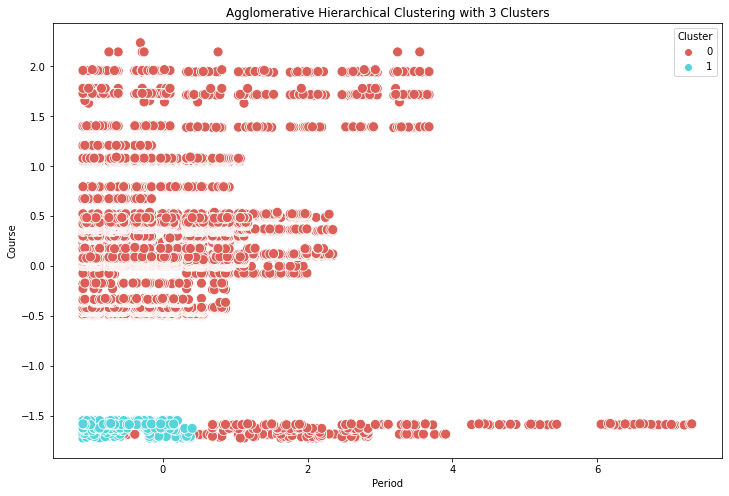

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(hc2_clustered['Period'], hc2_clustered['Course'], s=100, hue=hc2_clustered['Cluster'],
                palette=sns.color_palette('hls', 2))

plt.title('Agglomerative Hierarchical Clustering with 3 Clusters')

In [24]:
hc3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc3_clusters = hc3.fit(df_scale)

In [16]:
hc3_clustered = df_scale.copy()

#append labels to points
hc3_clustered.loc[:,'Cluster'] = hc3_clusters.labels_

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering with 3 Clusters')

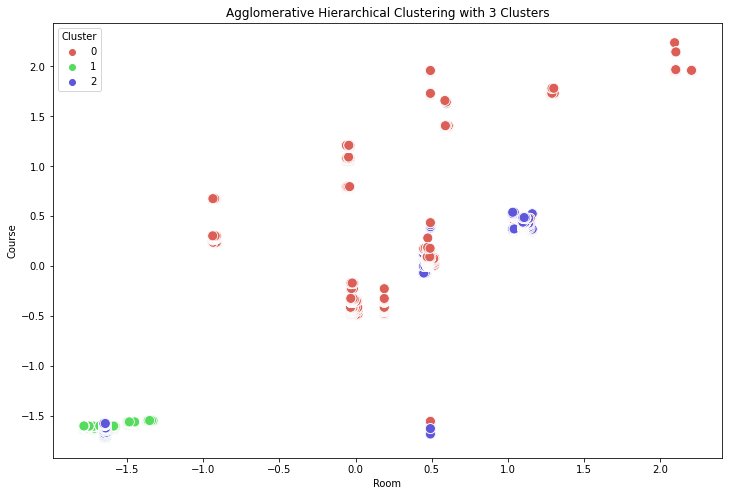

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(hc3_clustered['Room'], hc3_clustered['Course'], s=100, hue=hc3_clustered['Cluster'],
                palette=sns.color_palette('hls', 3))

plt.title('Agglomerative Hierarchical Clustering with 3 Clusters')

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering with 3 Clusters')

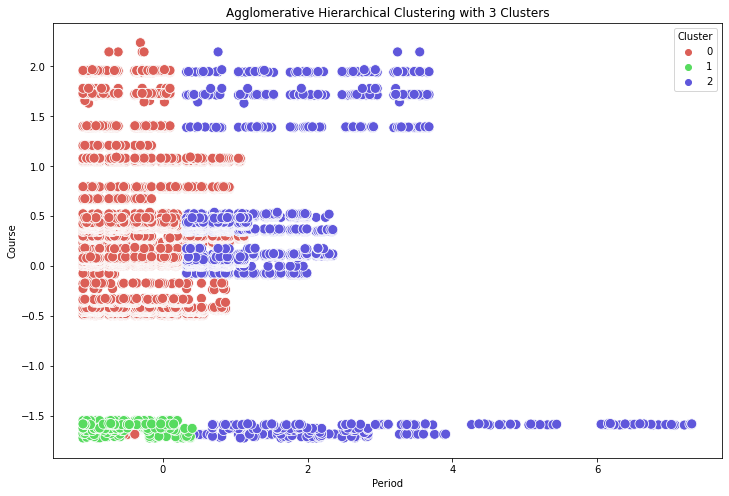

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(hc3_clustered['Period'], hc3_clustered['Course'], s=100, hue=hc3_clustered['Cluster'],
                palette=sns.color_palette('hls', 3))

plt.title('Agglomerative Hierarchical Clustering with 3 Clusters')